## HW1: Linear Regression using Gradient Descent
In hw1, you need to implement linear regression by using only numpy, then train your implemented model by the provided dataset and test the performance with testing data

Please note that only **NUMPY** can be used to implement your model, you will get no points by simply calling sklearn.linear_model.LinearRegression

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Load data

In [3]:
train_df = pd.read_csv("train_data.csv")
x_train, y_train = train_df['x_train'], train_df['y_train']

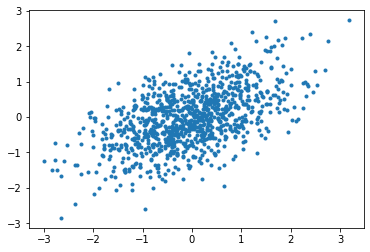

In [4]:
plt.plot(x_train, y_train, '.')

## Train your model 
### Pseudo code:
1. Random initialize the weights, intercepts of the linear model

**for i in range(iteration)**

    2. Feed foward the training data into the model, get the output prediction
    3. Calculating training loss by Mean Square Error of predcition and ground truth data
    4. Calculating the gradients
    5. Updating the weights and intercepts by the gradients * learning rate 
    
**End of training**

In [5]:
# Take a look of training dataset
train_df.head(20)
# y = weight* x + bias

,x_train,y_train
0,-0.234216,-0.081480
1,-2.030684,-0.396530
2,0.651781,-0.807760
3,2.014060,0.898653
4,0.829986,0.610621
5,0.351780,0.790841
6,1.301428,0.938295
7,-0.405942,-0.777277
8,-1.661598,-1.111687
9,-0.764144,1.015591


In [6]:
# Random initialize the weights [b,w].T
# theta = np.random.randn(2,1)
# print(theta)
# random 出來的數值來 initial b,w 如下

# theta[0]=bias, theta[1]=weight
theta = np.array([[-0.03151203], [0.78161212]])

In [7]:
# Define MSE, MAE finction
def MSE_function(y, yhat):
    MSE = ((y_train-yhat)**2).mean()
    return MSE


def MAE_function(y, yhat):
    MAE = (abs(y-yhat)).mean()
    return MAE

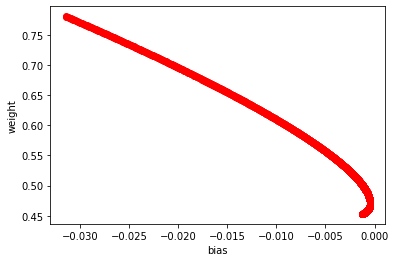

In [8]:
# Initialize learing rate and set iteration
lr = 0.0008  # learning rate
iteration = 5000

n = float(len(x_train))  # Number of elements in X

# Loss (MSE & MAE) record
mse_record = []
mae_record = []

# Iteration開始
for i in range(iteration):
    # 求出預測值
    yhat = theta[1]*x_train+theta[0]
    # record MSE & MAE
    mse_record.append(MSE_function(y_train, yhat))
    mae_record.append(MAE_function(y_train, yhat))

    # Calculate gradient
    D_w = (-2/n) * sum(x_train * (y_train-yhat))  # Derivative wrt w
    D_b = (-2/n) * sum(y_train-yhat)  # Derivative wrt b
    theta[1] = theta[1]-lr * D_w  # Update w
    theta[0] = theta[0]-lr * D_b  # Update b
    plt.plot(theta[0], theta[1], 'o-', color='red')


plt.xlabel('bias', color='black')
plt.ylabel('weight', color='black')
plt.xticks(color='black')
plt.yticks(color='black')
plt.show()

# reference: https://towardsdatascience.com/linear-regression-using-gradient-descent-97a6c8700931

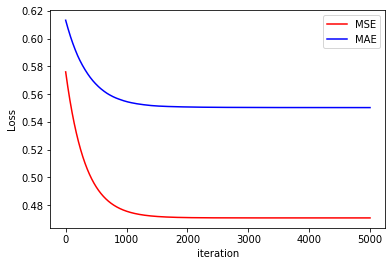

In [14]:
# Loss 變化

plt.plot(mse_record, color='red', label='MSE')
plt.plot(mae_record, color='blue', label='MAE')
plt.legend()
plt.xlabel('iteration', color='black')
plt.ylabel('Loss', color='black')
plt.xticks(color='black')
plt.yticks(color='black')
plt.show()

In [10]:
# 最後的 error, bias 以及 weight
print('MSE:', mse_record[iteration-1])
print('MAE:', mae_record[iteration-1])
print('weight:', theta[1])  # w
print('bias:', theta[0])  # b

MSE: 0.4708945841209164
MAE: 0.5503407457254242
weight: [0.45289541]
bias: [-0.00123045]


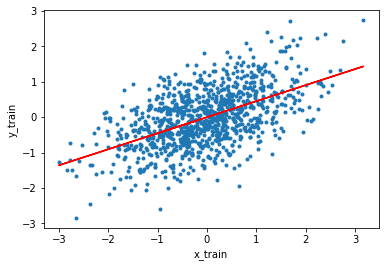

In [59]:
# 把圖畫出來
plt.plot(x_train, y_train, '.')
plt.plot(x_train, theta[1]*x_train+theta[0], ms=3, lw=1.5, color='red')
plt.xlabel('x_train', color='black')
plt.ylabel('y_train', color='black')
plt.xticks(color='black')
plt.yticks(color='black')
plt.show()

## Test the performance on the testing data
Inference the test data (x_test) by your model and calculate the MSE of (y_test, y_pred)

In [11]:
test_data = pd.read_csv("test_data.csv")
x_test, y_test = test_data['x_test'], test_data['y_test']

In [12]:
def model(x):
    return theta[1]*x+theta[0]


yhat = model(x_test)


def MSE_function(y, yhat):
    MSE = ((y-yhat)**2).mean()
    return MSE


def MAE_function(y, yhat):
    MAE = (abs(y-yhat)).mean()
    return MAE


print('MSE:', MSE_function(y_test, yhat))
print('MAE:', MAE_function(y_test, yhat))

MSE: 0.49089334870602513
MAE: 0.5613094758418951


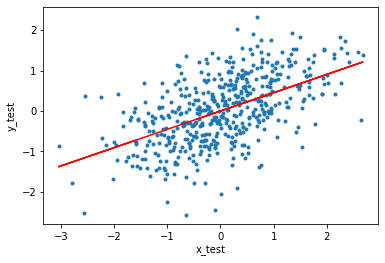

In [13]:
plt.plot(x_test, y_test, '.')
plt.plot(x_test, yhat, ms=3, lw=1.5, color='red')
plt.xlabel('x_test', color='black')
plt.ylabel('y_test', color='black')
plt.xticks(color='black')
plt.yticks(color='black')
plt.show()